# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
from google.colab import drive
drive.mount('/content/drive')#carga la carpeta en la nube de google drive

Mounted at /content/drive


In [2]:
# Implementa tu respuesta en esta celda
import pandas as pd#importar libreria pandas
import seaborn as sns#importar libreria seaborn
SB11_20161=pd.read_csv('/content/drive/MyDrive/Archivos/SB11_20161.txt',sep='¬')#cargar y dividir correctamente el archivo txt
SB11_20162=pd.read_csv('/content/drive/MyDrive/Archivos/SB11_20162.txt',sep='¬')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
datos=pd.concat([SB11_20161,SB11_20162],axis=0)#unimos los dos archivos en uno solo

In [ ]:
datos.info()#obtenemos informacion importante de los archivos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561269 entries, 0 to 548204
Data columns (total 85 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             561269 non-null  object 
 1   ESTU_NACIONALIDAD              561269 non-null  object 
 2   ESTU_GENERO                    561268 non-null  object 
 3   ESTU_FECHANACIMIENTO           561269 non-null  object 
 4   PERIODO                        561269 non-null  int64  
 5   ESTU_CONSECUTIVO               561269 non-null  object 
 6   ESTU_ESTUDIANTE                561269 non-null  object 
 7   ESTU_PAIS_RESIDE               561269 non-null  object 
 8   ESTU_TIENEETNIA                558612 non-null  object 
 9   ESTU_ETNIA                     34434 non-null   object 
 10  ESTU_DEPTO_RESIDE              561269 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          561269 non-null  int64  
 12  ESTU_MCPIO_RESIDE             


#Lista de variables de interes

|Variable| Como Aparece |
|:---:|:---:|
| Genero | ESTU_GENERO |
| Educacion del padre | FAMI_EDUCACIONPADRE |
| Educacion de la madre | FAMI_EDUCACIONMADRE |
| ocupacion del padre | FAMI_OCUPACIONPADRE |
| ocupacion de la madre | FAMI_OCUPACIONMADRE |
| Estrato | FAMI_ESTRATOVIVIENDA |
| Internet | FAMI_TIENEINTERNET |
| Computador | FAMI_TIENECOMPUTADOR |
| Telefono | FAMI_TELEFONO | FAMI_TIENECOMPUTADOR |
| Colegio bilingue | COLE_BILINGUE |
| Colegio caracter | COLE_CARACTER |
| Colegio jornada | COLE_JORNADA  |
| Desempeño ingles | DESEMP_INGLES |
| Puntaje global | PUNT_GLOBAL |

In [272]:
x=datos[(datos.ESTU_GENERO!='F')&(datos.ESTU_GENERO!='M')]#condiciones para obtener informacion relevante
x

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA,FAMI_TIENESERVICIOTV
34934,CC,COLOMBIA,NaN,28/09/1996,20162,SB11201620244244,ESTUDIANTE,COLOMBIA,No,NaN,...,37,A-,195,10,57.773478,NSE3,3.0,PUBLICAR,NO,Si


In [10]:
datos.FAMI_TIENECOMPUTADOR.fillna('No',inplace=True)#llena los datos nulos y los remplaza permanentemente
datos.FAMI_TIENEINTERNET.fillna('No',inplace=True)
datos.FAMI_TELEFONO.fillna('No',inplace=True)
datos.COLE_BILINGUE.replace('N','No',inplace=True)
datos.COLE_BILINGUE.replace('S','Si',inplace=True)
datos.COLE_BILINGUE.fillna('No',inplace=True)
datos.FAMI_OCUPACIONMADRE.fillna('Hogar',inplace=True)
datos.FAMI_OCUPACIONPADRE.fillna('Hogar',inplace=True)
moda=datos.ESTU_GENERO.mode()#Salida F
datos.ESTU_GENERO.fillna(str(moda),inplace=True)

In [9]:
Compu=datos.groupby(['FAMI_TIENECOMPUTADOR']).size().reset_index(name='Cantidad')#obtiene las categorias que se repiten
Inter=datos.groupby(['FAMI_TIENEINTERNET']).size().reset_index(name='Cantidad')
Telef=datos.groupby(['FAMI_TELEFONO']).size().reset_index(name='Cantidad')
Biling=datos.groupby(['COLE_BILINGUE']).size().reset_index(name='Cantidad')
Caract=datos.groupby(['COLE_CARACTER']).size().reset_index(name='Cantidad')
Coles=pd.concat([Biling,Caract])#union de dos grupos
Coles.drop([0],axis=0)#elimina fila no importante
Coles.drop(['COLE_BILINGUE'],axis=1)#elimina columna no importante
Coles.fillna('BILINGUE')#llena dato faltante
Coles.insert(0,"Id",[0,1,2,3,4,5],True)#se crea una nueva columna
Coles=Coles.set_index('Id')#se selecciona la nueva columna como columna de indices
Coles.drop([0],axis=0,inplace=True)#se elimina fila vacia
Coles.drop(['COLE_BILINGUE'],axis=1,inplace=True)#se elimina columna con datos repetidos o vacios
Coles.fillna('BILINGUE',inplace=True)#llena dato faltante
est_madr=datos.groupby(['FAMI_EDUCACIONMADRE']).size().reset_index(name='Estudio Madre')
est_padr=datos.groupby(['FAMI_EDUCACIONPADRE']).size().reset_index(name='Estudio Padre')#obtiene las categorias que se repiten
ocu_madr=datos.groupby(['FAMI_OCUPACIONMADRE']).size().reset_index(name='Ocupacion Madre')
ocu_padr=datos.groupby(['FAMI_OCUPACIONPADRE']).size().reset_index(name='Ocupacion Padre')
E_Padres=pd.concat([est_padr,est_madr],axis=1)#union de dos grupos por columna
E_Padres.drop(['FAMI_EDUCACIONMADRE'],axis=1,inplace=True)#elimina columna repetida
E_Padres.rename(columns={'FAMI_EDUCACIONPADRE':'Tipo de Educación'},inplace=True)#renombra la columna
O_Padres=pd.concat([ocu_madr,ocu_padr],axis=1)#union de dos grupos por columna
O_Padres.rename(columns={'FAMI_OCUPACIONMADRE':'Tipo de Ocupación'},inplace=True)#renombra la columna
O_Padres.drop(['FAMI_OCUPACIONPADRE'],axis=1,inplace=True)#elimina columna repetida
Ing=datos.groupby(['DESEMP_INGLES']).size().reset_index(name='Resultados')#obtiene las categorias que se repiten

In [278]:
datos.DESEMP_INGLES.isnull().any()#Forma de saber si una serie o columna tiene datos vacios

False

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Estadística descriptiva General
Varianza: 2366.557905831105, Desviación estándar: 48.64732389638838, Promedio: 259.7921584837217
Minimo: 0, Maximo: 494, Quartil 25%: 223.0, Quartil 50%: 258.0, Quartil 75%: 293.0

Estadística descriptiva Hombres
Varianza: 2458.0328341420063, Desviación estándar: 49.57864973562909, Promedio: 264.2762144310743
Minimo: 12, Maximo: 494, Quartil 25%: 227.0, Quartil 50%: 263.0, Quartil 75%: 299.0

Estadística descriptiva Mujeres
Varianza: 2260.5338129240745, Desviación estándar: 47.54514876411097, Promedio: 256.08436327180283
Minimo: 0, Maximo: 485, Quartil 25%: 220.0, Quartil 50%: 254.0, Quartil 75%: 288.0



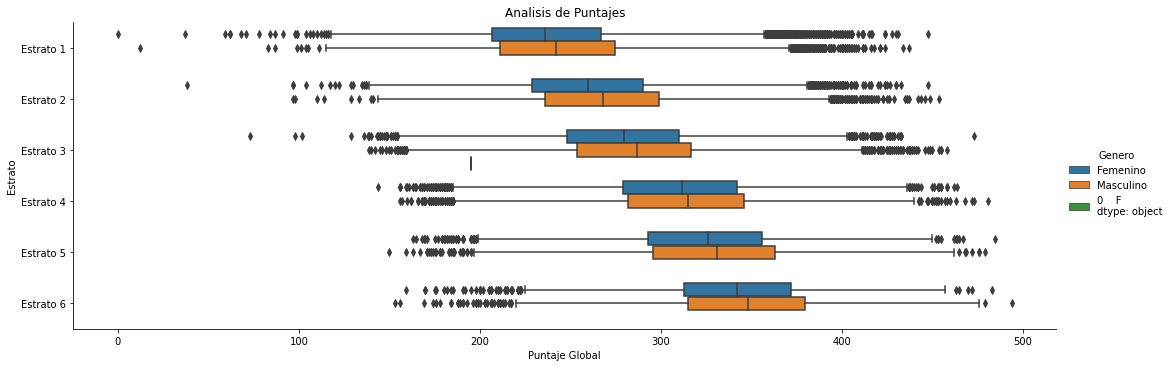

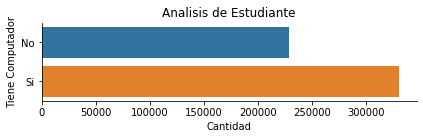

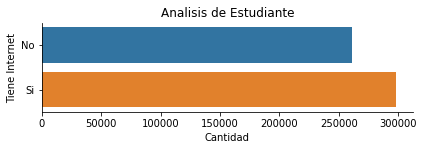

In [11]:
# Implementa tu respuesta en esta celda
relevante=datos[['ESTU_TIENEETNIA','ESTU_GENERO','FAMI_ESTRATOVIVIENDA','PERIODO','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_OCUPACIONPADRE',
                 'FAMI_OCUPACIONMADRE','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','FAMI_TELEFONO','ESTU_TRABAJAACTUALMENTE',
                 'COLE_BILINGUE','COLE_CARACTER','COLE_JORNADA','DESEMP_INGLES','PUNT_GLOBAL','ESTU_PILOPAGA']]#seleccion de columnas de interes

relevante.rename(columns={'ESTU_GENERO':'Genero'},inplace=True)#renombra columna
relevante.Genero.replace('F','Femenino',inplace=True)#reemplaza la 'f' por 'femenino'
relevante.Genero.replace('M','Masculino',inplace=True)#reemplaza la 'm' por 'masculino'
ax=sns.catplot(x='PUNT_GLOBAL', y='FAMI_ESTRATOVIVIENDA',orient='h', data=relevante, hue='Genero',kind='box',order=['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6'],height = 5,aspect = 3)
#grafica de cajas de los puntajes globales
ax.set_xlabels('Puntaje Global')#renombra subtitulos de grafica en eje x
ax.set_ylabels('Estrato')#renombra subtitulos de grafica en eje y
ax.set(title='Analisis de Puntajes')#renombra el titulo de la grafica

M=relevante[(relevante.Genero=='Masculino')]#obtencion de solo datos 'masculino'
F=relevante[(relevante.Genero=='Femenino')]#obtencion de solo datos 'femenino'
print('Estadística descriptiva General')
print(f'Varianza: {relevante.PUNT_GLOBAL.var(ddof=0)}, Desviación estándar: {relevante.PUNT_GLOBAL.std()}, Promedio: {relevante.PUNT_GLOBAL.mean()}')
print(f'Minimo: {relevante.PUNT_GLOBAL.min()}, Maximo: {relevante.PUNT_GLOBAL.max()}, Quartil 25%: {relevante.PUNT_GLOBAL.quantile(0.25)}, Quartil 50%: {relevante.PUNT_GLOBAL.quantile(0.5)}, Quartil 75%: {relevante.PUNT_GLOBAL.quantile(0.75)}')
print('')
print('Estadística descriptiva Hombres')
print(f'Varianza: {M.PUNT_GLOBAL.var(ddof=0)}, Desviación estándar: {M.PUNT_GLOBAL.std()}, Promedio: {M.PUNT_GLOBAL.mean()}')
print(f'Minimo: {M.PUNT_GLOBAL.min()}, Maximo: {M.PUNT_GLOBAL.max()}, Quartil 25%: {M.PUNT_GLOBAL.quantile(0.25)}, Quartil 50%: {M.PUNT_GLOBAL.quantile(0.5)}, Quartil 75%: {M.PUNT_GLOBAL.quantile(0.75)}')
print('')
print('Estadística descriptiva Mujeres')
print(f'Varianza: {F.PUNT_GLOBAL.var(ddof=0)}, Desviación estándar: {F.PUNT_GLOBAL.std()}, Promedio: {F.PUNT_GLOBAL.mean()}')
print(f'Minimo: {F.PUNT_GLOBAL.min()}, Maximo: {F.PUNT_GLOBAL.max()}, Quartil 25%: {F.PUNT_GLOBAL.quantile(0.25)}, Quartil 50%: {F.PUNT_GLOBAL.quantile(0.5)}, Quartil 75%: {F.PUNT_GLOBAL.quantile(0.75)}')
print('')

compu=sns.catplot(x='Cantidad', y='FAMI_TIENECOMPUTADOR',orient='h', data=Compu,kind='bar',height = 2,aspect = 3)#grafica computador
compu.set_ylabels('Tiene Computador')#renombra subtitulos de grafica en eje y
compu.set(title='Analisis de Estudiante')#renombra el titulo de la grafica

inter=sns.catplot(x='Cantidad', y='FAMI_TIENEINTERNET',orient='h', data=Inter,kind='bar',height = 2,aspect = 3)#grafica internet
inter.set_ylabels('Tiene Internet')#renombra subtitulos de grafica en eje y
inter.set(title='Analisis de Estudiante')#renombra el titulo de la grafica


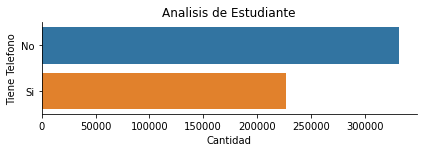

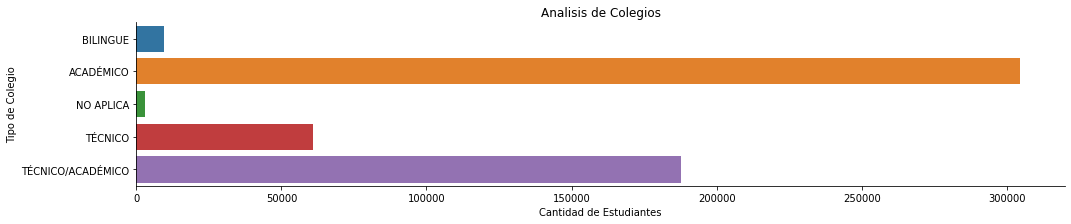

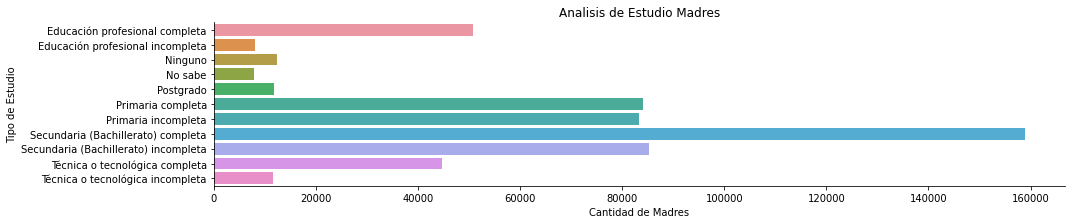

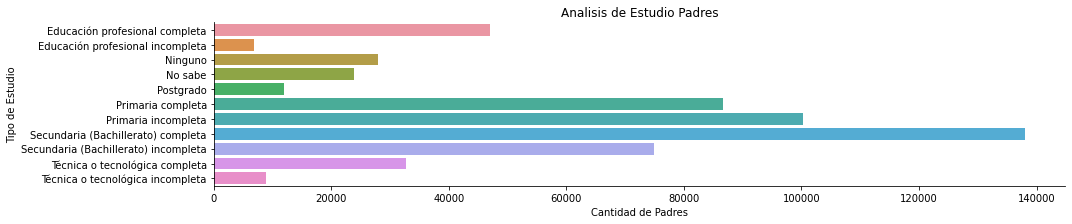

In [12]:
telef=sns.catplot(x='Cantidad', y='FAMI_TELEFONO',orient='h', data=Telef,kind='bar',height = 2,aspect = 3)#grafica telefono
telef.set_ylabels('Tiene Telefono')#renombra subtitulos de grafica en eje y
telef.set(title='Analisis de Estudiante')#renombra el titulo de la grafica

coles=sns.catplot(x='Cantidad', y='COLE_CARACTER',orient='h', data=Coles,kind='bar',height = 3,aspect = 5)#grafica colegios
coles.set_ylabels('Tipo de Colegio')#renombra subtitulos de grafica en eje y
coles.set_xlabels('Cantidad de Estudiantes')#renombra subtitulos de grafica en eje x
coles.set(title='Analisis de Colegios')#renombra el titulo de la grafica

e_madres=sns.catplot(x='Estudio Madre', y='Tipo de Educación',orient='h', data=E_Padres,kind='bar',height = 3,aspect = 5)#grafica educacion madres
e_madres.set_ylabels('Tipo de Estudio')#renombra subtitulos de grafica en eje y
e_madres.set_xlabels('Cantidad de Madres')#renombra subtitulos de grafica en eje x
e_madres.set(title='Analisis de Estudio Madres')#renombra el titulo de la grafica

e_padres=sns.catplot(x='Estudio Padre', y='Tipo de Educación',orient='h', data=E_Padres,kind='bar',height = 3,aspect = 5)#grafica educacion padres
e_padres.set_ylabels('Tipo de Estudio')#renombra subtitulos de grafica en eje y
e_padres.set_xlabels('Cantidad de Padres')#renombra subtitulos de grafica en eje x
e_padres.set(title='Analisis de Estudio Padres')#renombra el titulo de la grafica

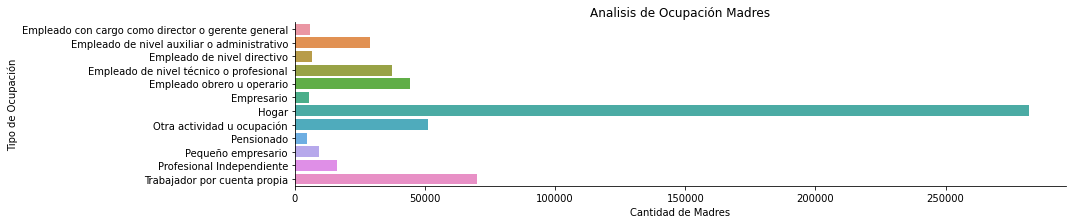

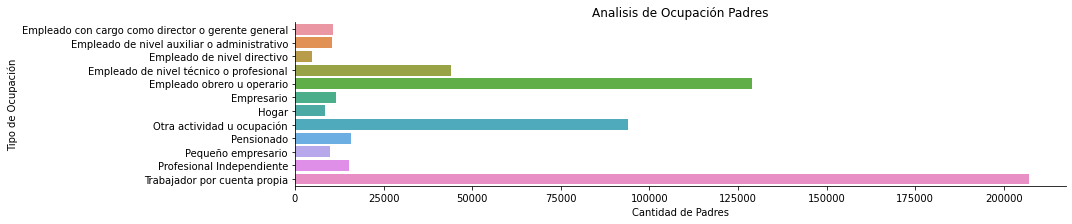

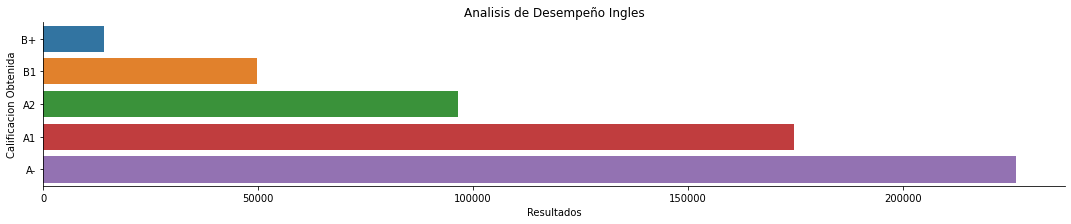

In [295]:
o_madres=sns.catplot(x='Ocupacion Madre', y='Tipo de Ocupación',orient='h', data=O_Padres,kind='bar',height = 3,aspect = 5)#grafica ocupacion madres
o_madres.set_ylabels('Tipo de Ocupación')#renombra subtitulos de grafica en eje y
o_madres.set_xlabels('Cantidad de Madres')#renombra subtitulos de grafica en eje x
o_madres.set(title='Analisis de Ocupación Madres')#renombra el titulo de la grafica

o_padres=sns.catplot(x='Ocupacion Padre', y='Tipo de Ocupación',orient='h', data=O_Padres,kind='bar',height = 3,aspect = 5)#grafica ocupacion padres
o_padres.set_ylabels('Tipo de Ocupación')#renombra subtitulos de grafica en eje y
o_padres.set_xlabels('Cantidad de Padres')#renombra subtitulos de grafica en eje x
o_padres.set(title='Analisis de Ocupación Padres')#renombra el titulo de la grafica

ing=sns.catplot(x='Resultados', y='DESEMP_INGLES',orient='h', data=Ing,kind='bar',order=['B+','B1','A2','A1','A-'],height = 3,aspect = 5)#grafica ingles
ing.set_ylabels('Calificacion Obtenida')#renombra subtitulos de grafica en eje y
ing.set_xlabels('Resultados')#renombra subtitulos de grafica en eje x
ing.set(title='Analisis de Desempeño Ingles')#renombra el titulo de la grafica

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

                            OLS Regression Results                            
Dep. Variable:            Dependiente   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.893e+06
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:47:00   Log-Likelihood:            -1.3003e+05
No. Observations:              561269   AIC:                         2.601e+05
Df Residuals:                  561267   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4912      0.002   -276.924

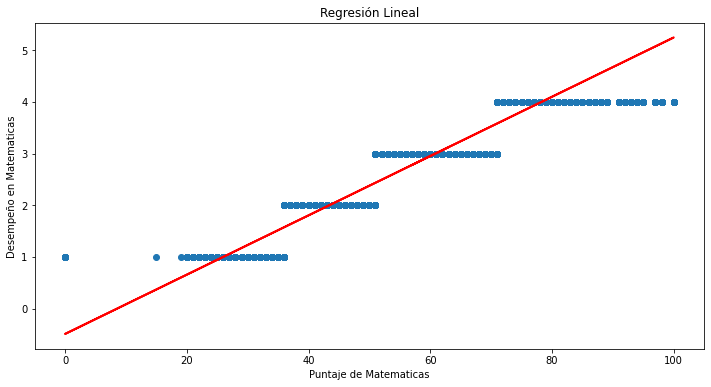

In [6]:
# Implementa tu respuesta en esta celda
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#listas de datos
x=datos.PUNT_MATEMATICAS
y=datos.DESEMP_MATEMATICAS

df = pd.DataFrame(                      # Asignacion de ejes
    {'Independiente': x,
     'Dependiente': y})
#creo el modelo de regresión lineal
model = smf.ols(formula='Dependiente ~ Independiente', data=df).fit()
print(model.summary())                  #muestra un sumario de la regresión realizada

print(model.params)                     #muestra los coeficientes de regresión c, m
eq='y='+str(round(model.params[1],3))+'*x'+str(round(model.params[0],3))
print('Ecuación de regresión:         '+eq)#muestra ecuacion


prediccion = model.predict()            # calcula la recta del modelo
#Grafica
plt.figure(figsize=(12, 6))
plt.plot(df['Independiente'], df['Dependiente'], 'o')          
plt.plot(df['Independiente'], prediccion, 'r', linewidth=2)   
plt.xlabel('Puntaje de Matematicas')
plt.ylabel('Desempeño en Matematicas')
plt.title('Regresión Lineal')
plt.show()

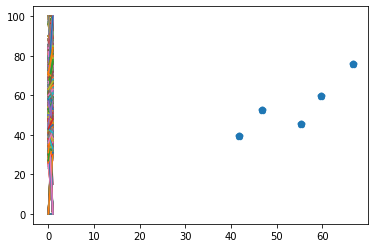

In [6]:
import numpy as np
from sklearn.cluster import KMeans
df=pd.DataFrame(datos)
x=df['PUNT_LECTURA_CRITICA'].values
y=df['PUNT_INGLES'].values
X=np.array(list(zip(x,y)))
kmeans=KMeans(n_clusters=5)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_
colors=['m.','r.','b.','y.','g.']
for i in range(len(X)):           #Forma de asignar grupos dependiendo los mas cercanos a los centroides
  plt.plot((X[i][0],X[i][1]))
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=10,linewidths=5,zorder=10)
plt.show()

Error: 52.44794358819437
El valor de r^2: 0.44246264861462103


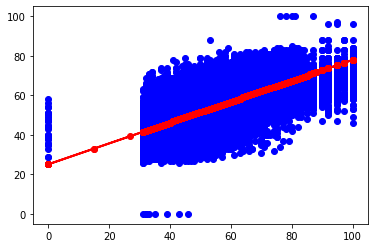

In [7]:
from sklearn import linear_model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df=pd.DataFrame(datos)
x=df['PUNT_INGLES']
y=df['PUNT_LECTURA_CRITICA']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)#asignacion de variables para entrenamiento y test

X_train=X_train.values.reshape([X_train.values.shape[0],1])#ajuste para solucionar error
X_test=X_test.values.reshape([X_test.values.shape[0],1])#ajuste para solucionar error
y_train=y_train.values.reshape([y_train.values.shape[0],1])#ajuste para solucionar error

regr=linear_model.LinearRegression()#metodo para entrenar el modelo
regr.fit(X_train, y_train)#datos del entrenamiento del modelo
y_predict=regr.predict(X_test)#prediccion

plt.scatter(X_train,y_train,color='blue')#grafica con datos del entrenamiento
plt.scatter(X_test,y_predict,color='red')#grafica con datos del testeo
plt.plot(X_test, y_predict, 'r', linewidth=2)#linea de regrecion lineal

print('Error:',mean_squared_error(y_test,y_predict))#calcula el error
print('El valor de r^2:',r2_score(y_test,y_predict))#Calcula el 'r' cuadrado